In [ ]:
pip install seaborn matplotlib


In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


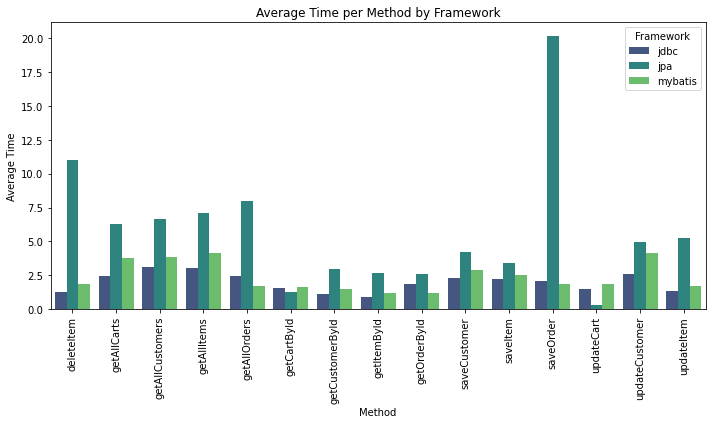

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data1 = pd.read_csv('results_jdbc.csv',sep=';',header=None,names=['framework', 'method', 'time'])
data2 = pd.read_csv('results_jpa.csv',sep=';',header=None, names=['framework', 'method', 'time'])
data3 = pd.read_csv('results_mybatis.csv',sep=';',header=None, names=['framework', 'method', 'time'])

data = pd.concat([data1, data2, data3], ignore_index=True)

# Berechnen Sie den Durchschnitt der Aufrufzeiten für jede Methode pro Framework
avg_times = data.groupby(['framework', 'method'])['time'].mean().reset_index()

# Erstellen Sie ein Balkendiagramm mit seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='method', y='time', hue='framework', data=avg_times, palette='viridis')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Method')
plt.ylabel('Average Time')
plt.title('Average Time per Method by Framework')
plt.xticks(rotation=90)
plt.legend(title='Framework')

# Diagramm anzeigen
plt.tight_layout()
plt.show()